# Predicting Bank Customer Churn

## Introduction and Dataset Overview

![image](https://live.staticflickr.com/7137/13890661614_b35e77b9b0_b.jpg)

### Introduction

Customer churn, the act of customers discontinuing their relationship with a business, poses a significant challenge across industries, particularly within the banking sector. This Jupyter notebook focuses on predictive analysis of customer churn using a comprehensive dataset that captures various attributes of bank customers.

### About the Dataset

The dataset utilized in this analysis comprises crucial information about bank customers, distinguishing between those who have chosen to exit the bank and those who have remained as customers.

### Objective

The primary objective of this analysis is to employ machine learning techniques to develop predictive models capable of determining whether a customer is likely to churn based on the provided dataset. By conducting exploratory data analysis (EDA), performing feature engineering, and building predictive models, this analysis aims to uncover underlying patterns and insights that can assist in identifying potential churn risks among bank customers.

## Data Exploration

### Dataset Snapshot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


#### Observations:

- **CustomerID:** Unique identifiers for each customer.
- **Surname:** Last name of the customers.
- **CreditScore:** Numerical representation of the customer's credit score.
- **Geography:** Country of residence, including France and Spain.
- **Gender:** Gender of the customers, primarily Male in this subset.
- **Age:** Age of the customers, varying between 33 and 40.
- **Tenure:** The duration, in years, of the customer's relationship with the bank.
- **Balance:** Account balance, with some entries showing 0.00.
- **NumOfProducts:** The number of bank products utilized by customers, mostly 2.
- **HasCrCard:** Indicates whether the customer has a credit card (1 = yes, 0 = no).
- **IsActiveMember:** Indicates whether the customer is an active member (1 = yes, 0 = no).
- **EstimatedSalary:** The estimated salary of the customers, with varying values.

#### Insights:

- Several customers have a balance of 0.00, suggesting potential areas for further investigation.
- Most customers have more than one bank product.
- The dataset includes customers from different countries with varying credit scores, ages, and tenure.

This initial glimpse provides a snapshot of the dataset, setting the stage for further exploratory analysis and model development.

### Dataset Information Summary

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


The dataset summary obtained from the `train.info()` function offers valuable insights into the dataset structure and characteristics:

- **Total Rows:** The dataset contains a total of 165,034 entries, indexed from 0 to 165,033.
- **Columns:** There are 13 columns in total, each representing a specific attribute of the dataset.
- **Data Types:**
  - **Integer (int64):** Columns like `CustomerId`, `CreditScore`, `Tenure`, `NumOfProducts`, and `Exited` are stored as integers.
  - **Float (float64):** Attributes such as `Age`, `Balance`, `HasCrCard`, `IsActiveMember`, and `EstimatedSalary` are represented as floating-point numbers.
  - **Object (string):** `Surname`, `Geography`, and `Gender` columns contain string (object) data types.
- **Memory Usage:** The dataset consumes approximately 17.6+ MB of memory.

#### Observations:

- **Non-Null Counts:** All columns exhibit a non-null count of 165,034, indicating that there are no missing values present in the dataset.
- **Column Types:** The dataset consists of a balanced combination of numerical (integer and float) and categorical (object) columns, enabling a diverse analysis of customer attributes.

#### Insights:

- The absence of missing values across all columns ensures a complete dataset, facilitating a comprehensive analysis.
- The diverse data types suggest the necessity for appropriate preprocessing steps, such as encoding categorical variables and scaling numerical attributes, before feeding the data into machine learning models.

### Statistical Summary of the Dataset

In [3]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


The statistical summary provides key insights into the numerical attributes of the dataset:

- **CustomerID:**
  - **Count:** 165,034 unique customer IDs are available in the dataset.
- **CreditScore:**
  - **Mean:** The average credit score of customers is approximately 656.45.
  - **Minimum:** The minimum credit score observed is 350.
  - **Maximum:** The maximum credit score recorded is 850.
- **Age:**
  - **Mean:** The average age of customers is around 38.13 years.
  - **Minimum:** The youngest customer in the dataset is 18 years old.
  - **Maximum:** The oldest customer recorded is 92 years old.
- **Tenure:**
  - **Mean:** The average tenure of customers with the bank is approximately 5.02 years.
  - **Minimum:** The minimum tenure observed is 0 years.
  - **Maximum:** The maximum tenure recorded is 10 years.
- **Balance:**
  - **Mean:** The mean account balance of customers is approximately 55,478.09.
  - **Minimum:** Some customers have a zero balance in their accounts.
  - **Maximum:** The highest account balance observed is around 250,898.09.
- **NumOfProducts:**
  - **Mean:** On average, customers utilize around 1.55 bank products.
  - **Minimum:** The minimum number of bank products used is 1.
  - **Maximum:** The maximum number of bank products used is 4.
- **HasCrCard:**
  - **Mean:** Around 75.4% of customers have a credit card.
- **IsActiveMember:**
  - **Mean:** Approximately 49.8% of customers are active members.
- **EstimatedSalary:**
  - **Mean:** The average estimated salary of customers is roughly 112,574.82.
  - **Minimum:** The minimum estimated salary recorded is 11.58.
  - **Maximum:** The highest estimated salary observed is around 199,992.48.
- **Exited:**
  - **Mean:** Around 21.2% of customers have churned.

#### Observations:

- The dataset contains diverse ranges of attributes, including credit scores, ages, tenures, account balances, and estimated salaries.
- Notably, a significant portion of customers have zero balance in their accounts.
- The average number of products used by customers is approximately 1.55, with a maximum of 4 products.
- Roughly 21.2% of customers in the dataset have churned.

#### Insights:

- Understanding the distribution and range of these attributes will be crucial for feature selection and building predictive models to identify potential churn risks among customers.

### Pie Plot Analysis of Categorical Variables

In [4]:
# Define a threshold to determine categorical columns based on unique value counts
categorical_threshold = 10  # You can adjust this threshold based on your dataset characteristics

# Get columns with less than the defined threshold as categorical columns
cat_cols = [col for col in data.drop(["Exited", "CustomerId", "Surname"], axis=1) 
            if data[col].nunique() < categorical_threshold]

# Remaining columns are considered numerical
num_cols = [col for col in data.drop(["Exited", "CustomerId", "Surname"], axis=1) if col not in cat_cols]

In [5]:
def plot_target(data: pd.DataFrame, col: str, title: str, pie_colors: list, test_df: pd.DataFrame = pd.DataFrame()) -> None:
    if not test_df.empty:
        fig, axes = plt.subplots(1, 4, figsize=(20, 6), gridspec_kw={'width_ratios': [2, 1, 2, 1]})
        
        for i, data in enumerate([data, test_df]):
            textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}
            ax = axes[i * 2]
            
            ax.pie(data[col].value_counts().to_list(),
                colors=pie_colors,
                labels=data[col].value_counts().index.to_list(),
                autopct='%1.f%%',
                explode=([.05] * data[col].nunique()),
                pctdistance=0.5,
                wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
                textprops=textprops)

            sns.countplot(x=col, data=data, palette='pastel6', hue=col, order=data[col].value_counts().to_dict().keys(), ax=axes[i * 2 + 1])

            for p, count in enumerate(data[col].value_counts().to_dict().values(), 0):
                axes[i * 2 + 1].text(p - 0.1, count + (np.sqrt(count)), count, color='black', fontsize=13)

            plt.setp(axes[i * 2 + 1].get_xticklabels(), fontweight='bold')
            plt.yticks([], ax=axes[i * 2 + 1])
            axes[i * 2 + 1].set_ylabel('')
            axes[i * 2 + 1].set_xlabel('')
            # axes[i * 2 + 1].get_legend().remove()
            # plt.box(False, ax=axes[i * 2 + 1])

            axes[i * 2].set_title(f'Distribution in {"Train" if i == 0 else "Test"} Set', fontsize=16, fontweight='bold')

        fig.suptitle(x=0.5, y=1.05, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

        textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
        ax[0].pie(data[col].value_counts().to_list(),
                colors=pie_colors,
                labels=data[col].value_counts().index.to_list(),
                autopct='%1.f%%', 
                explode=([.05]*data[col].nunique()),
                pctdistance=0.5,
                wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
                textprops=textprops)

        sns.countplot(x = col, data=data, palette = "pastel6", hue=col, order=data[col].value_counts().to_dict().keys())
        for p, count in enumerate(data[col].value_counts().to_dict().values(),0):
            ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
        plt.setp(ax[1].get_xticklabels(), fontweight="bold")
        plt.yticks([])
        plt.box()
        fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
        plt.tight_layout()
        plt.show()

#### "Exited" Distribution

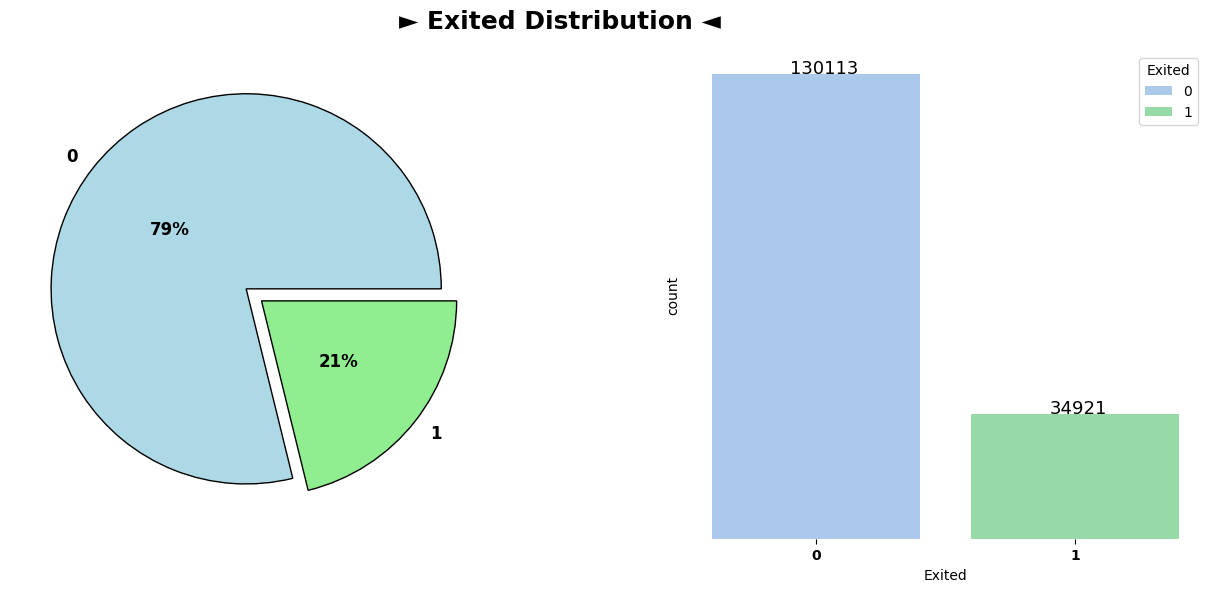

In [6]:
plot_target(data,
            col='Exited', 
            title='Exited', 
            pie_colors=['lightblue', 'lightgreen', 'orange'])

The pie chart representing the distribution of customers who have exited and those who haven't shows a clear distinction. Approximately 21% of customers have churned (Exited), while the remaining 79% have chosen to continue their relationship with the bank. This disparity indicates an imbalance in the churn behavior within the dataset.

#### Categorical Variable Distributions (Train and Test Sets)

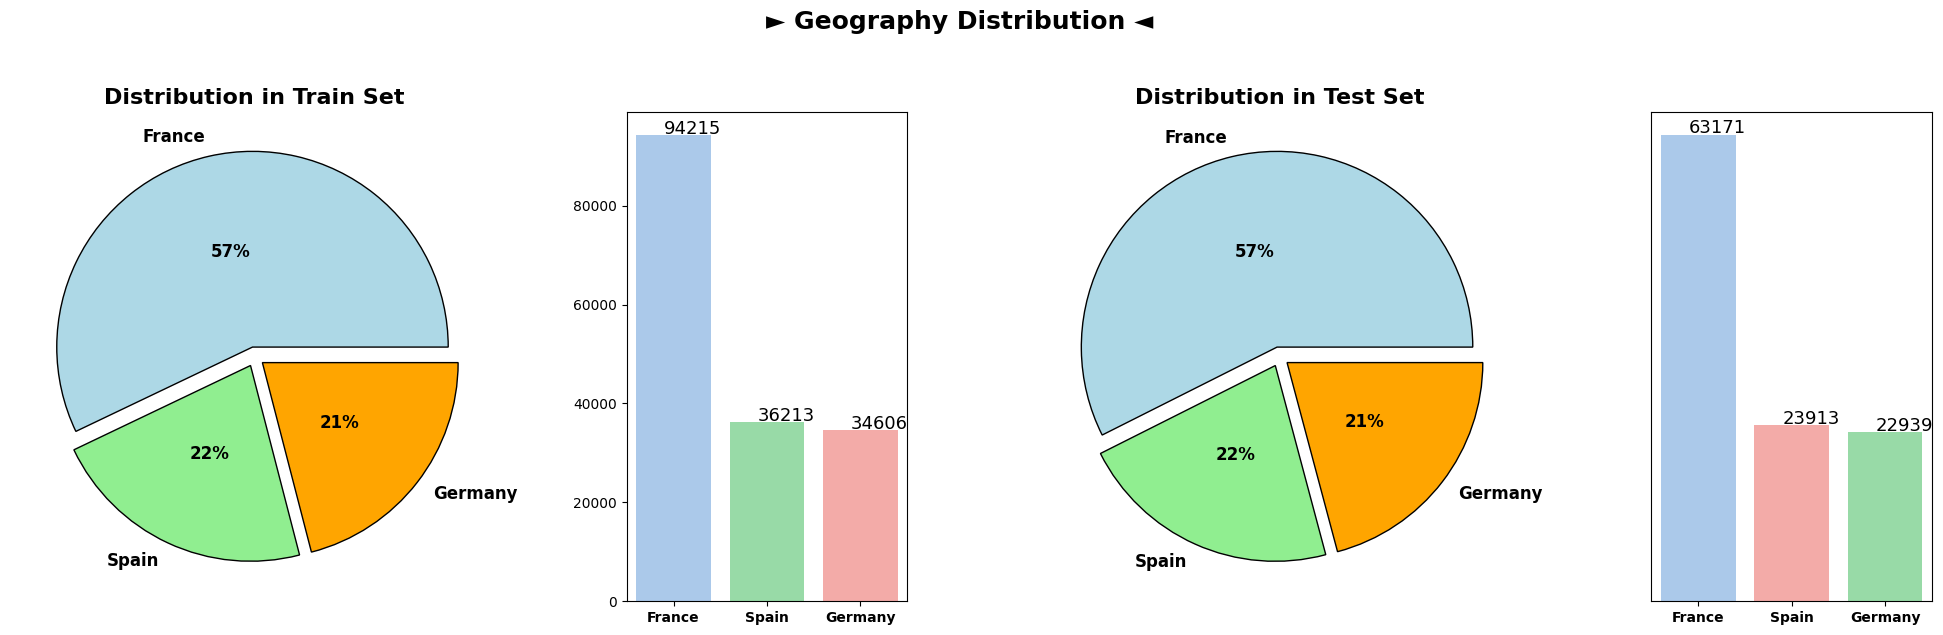

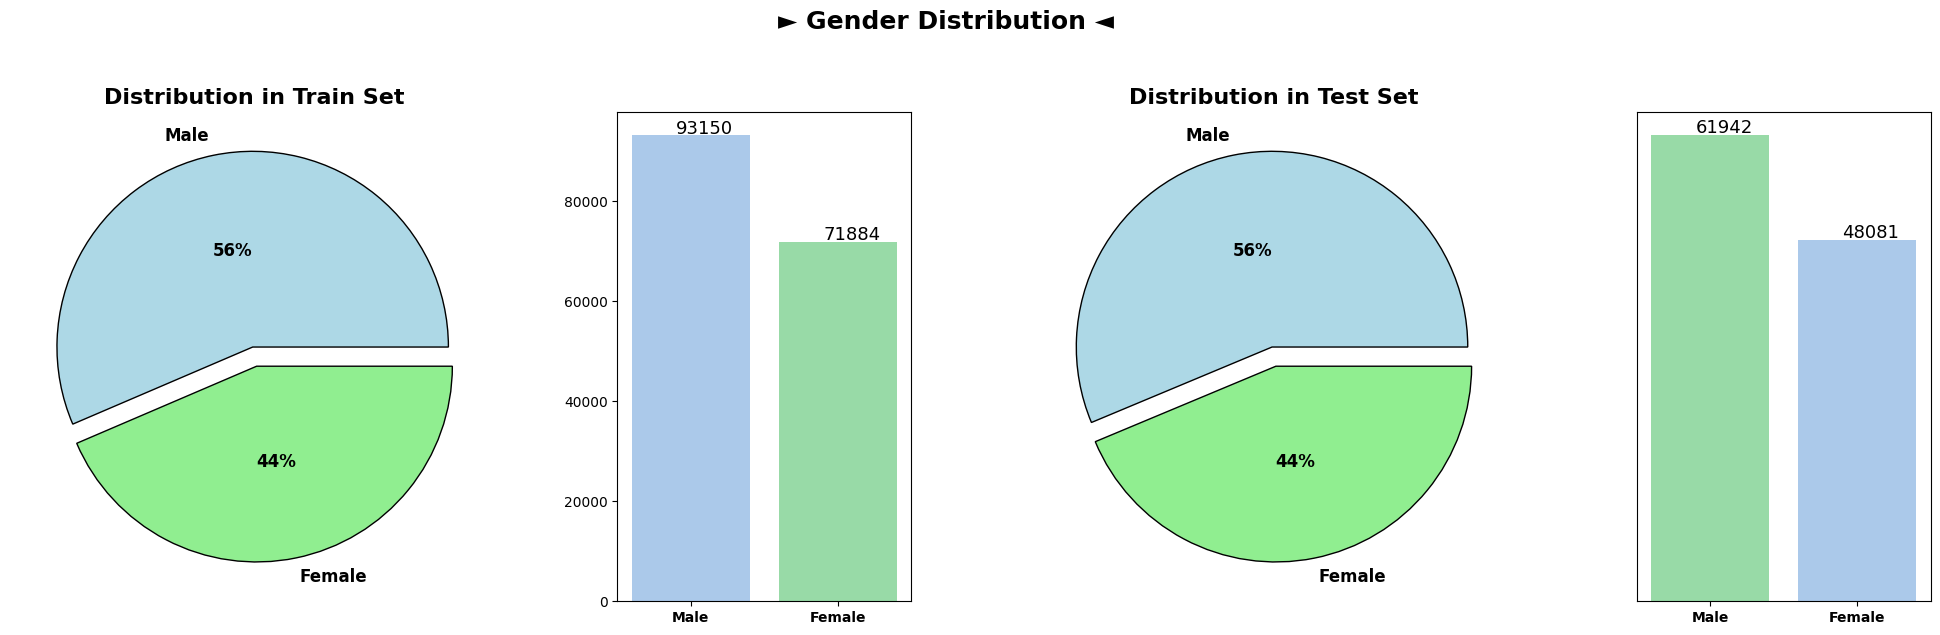

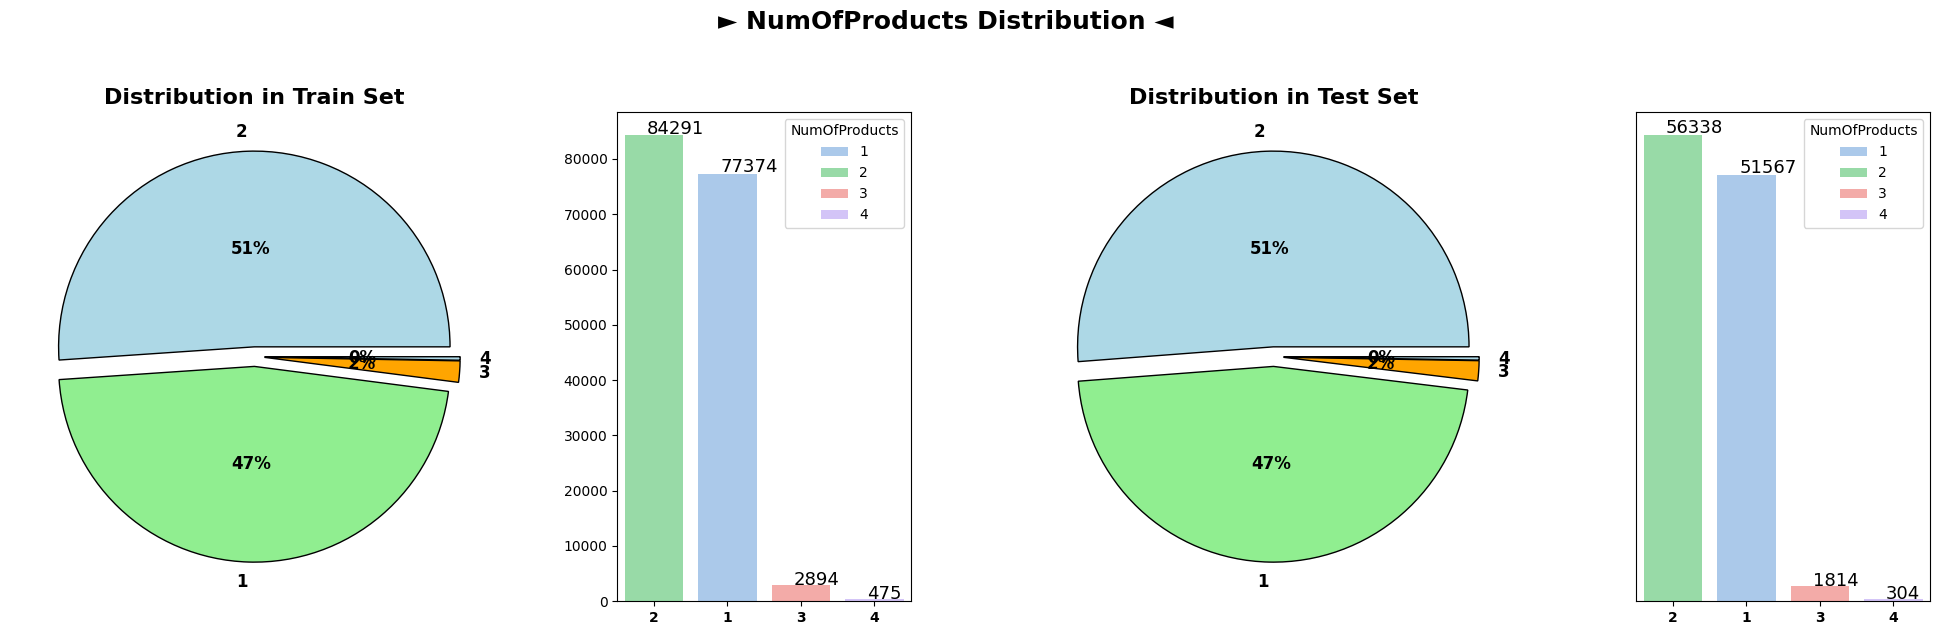

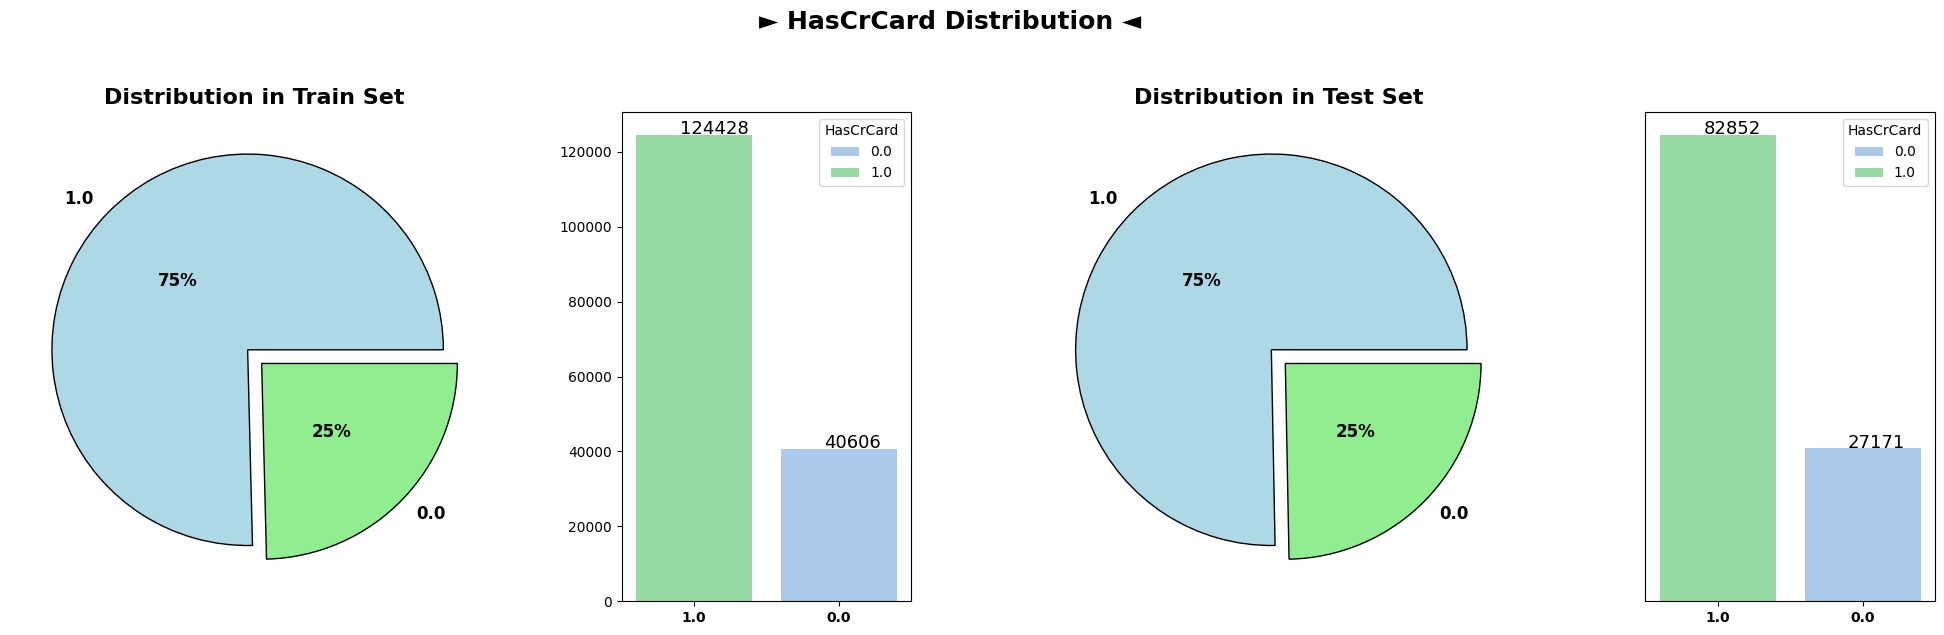

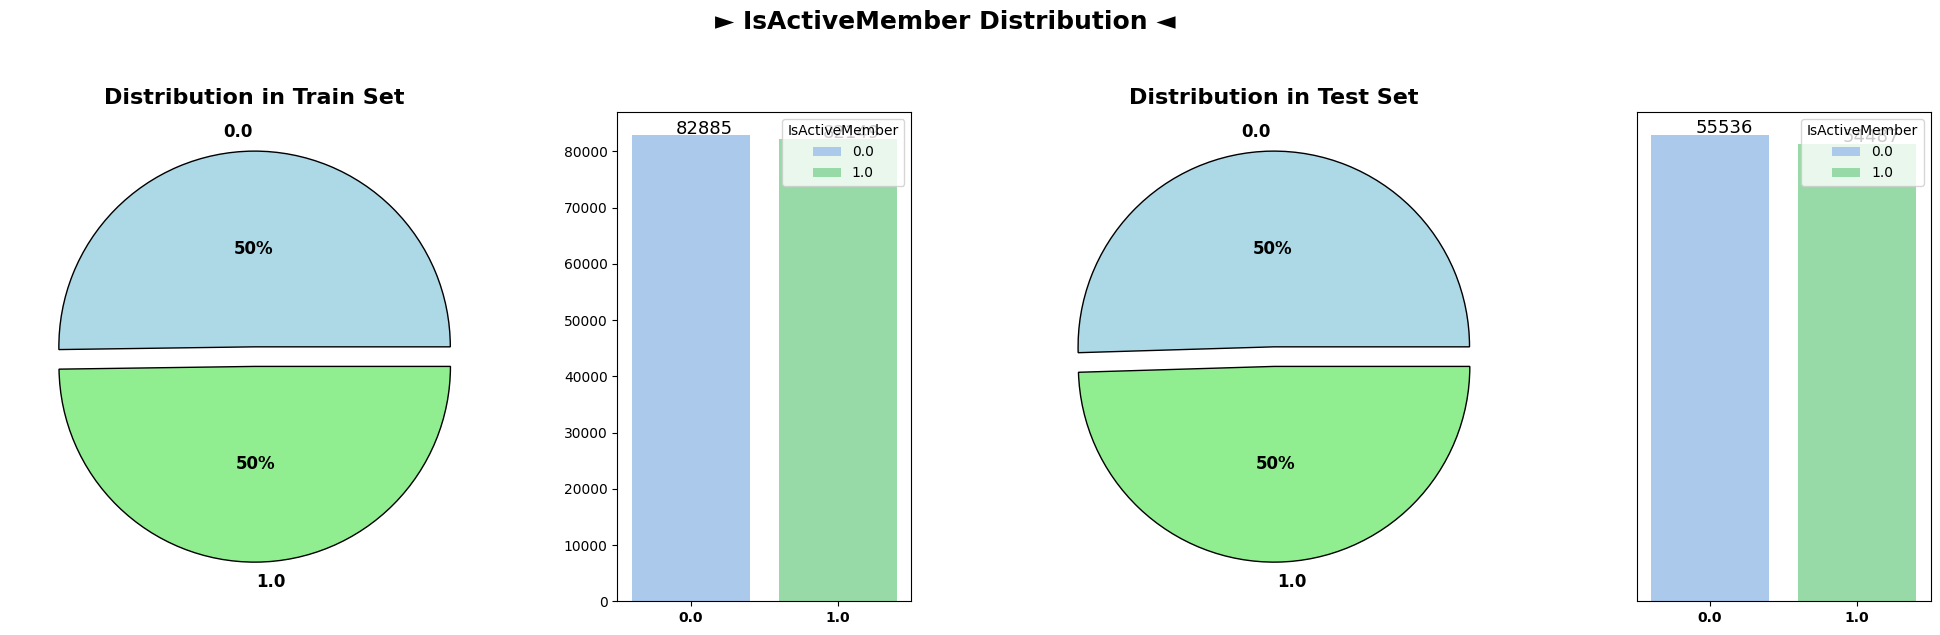

In [7]:
for cat_col in cat_cols:
    plot_target(data=data,
                test_df=test_df, 
                col=cat_col, 
                title=cat_col, 
                pie_colors=['lightblue', 'lightgreen', 'orange'])

The subsequent plots illustrate the distributions of various categorical columns in both the train and test datasets. Across the categorical attributes namely as Geography and Gender, the distributions remain notably similar between the train and test sets. This similarity suggests that the categorical characteristics of customers are consistent between the datasets, indicating a reliable alignment in terms of categorical attributes across both training and testing data

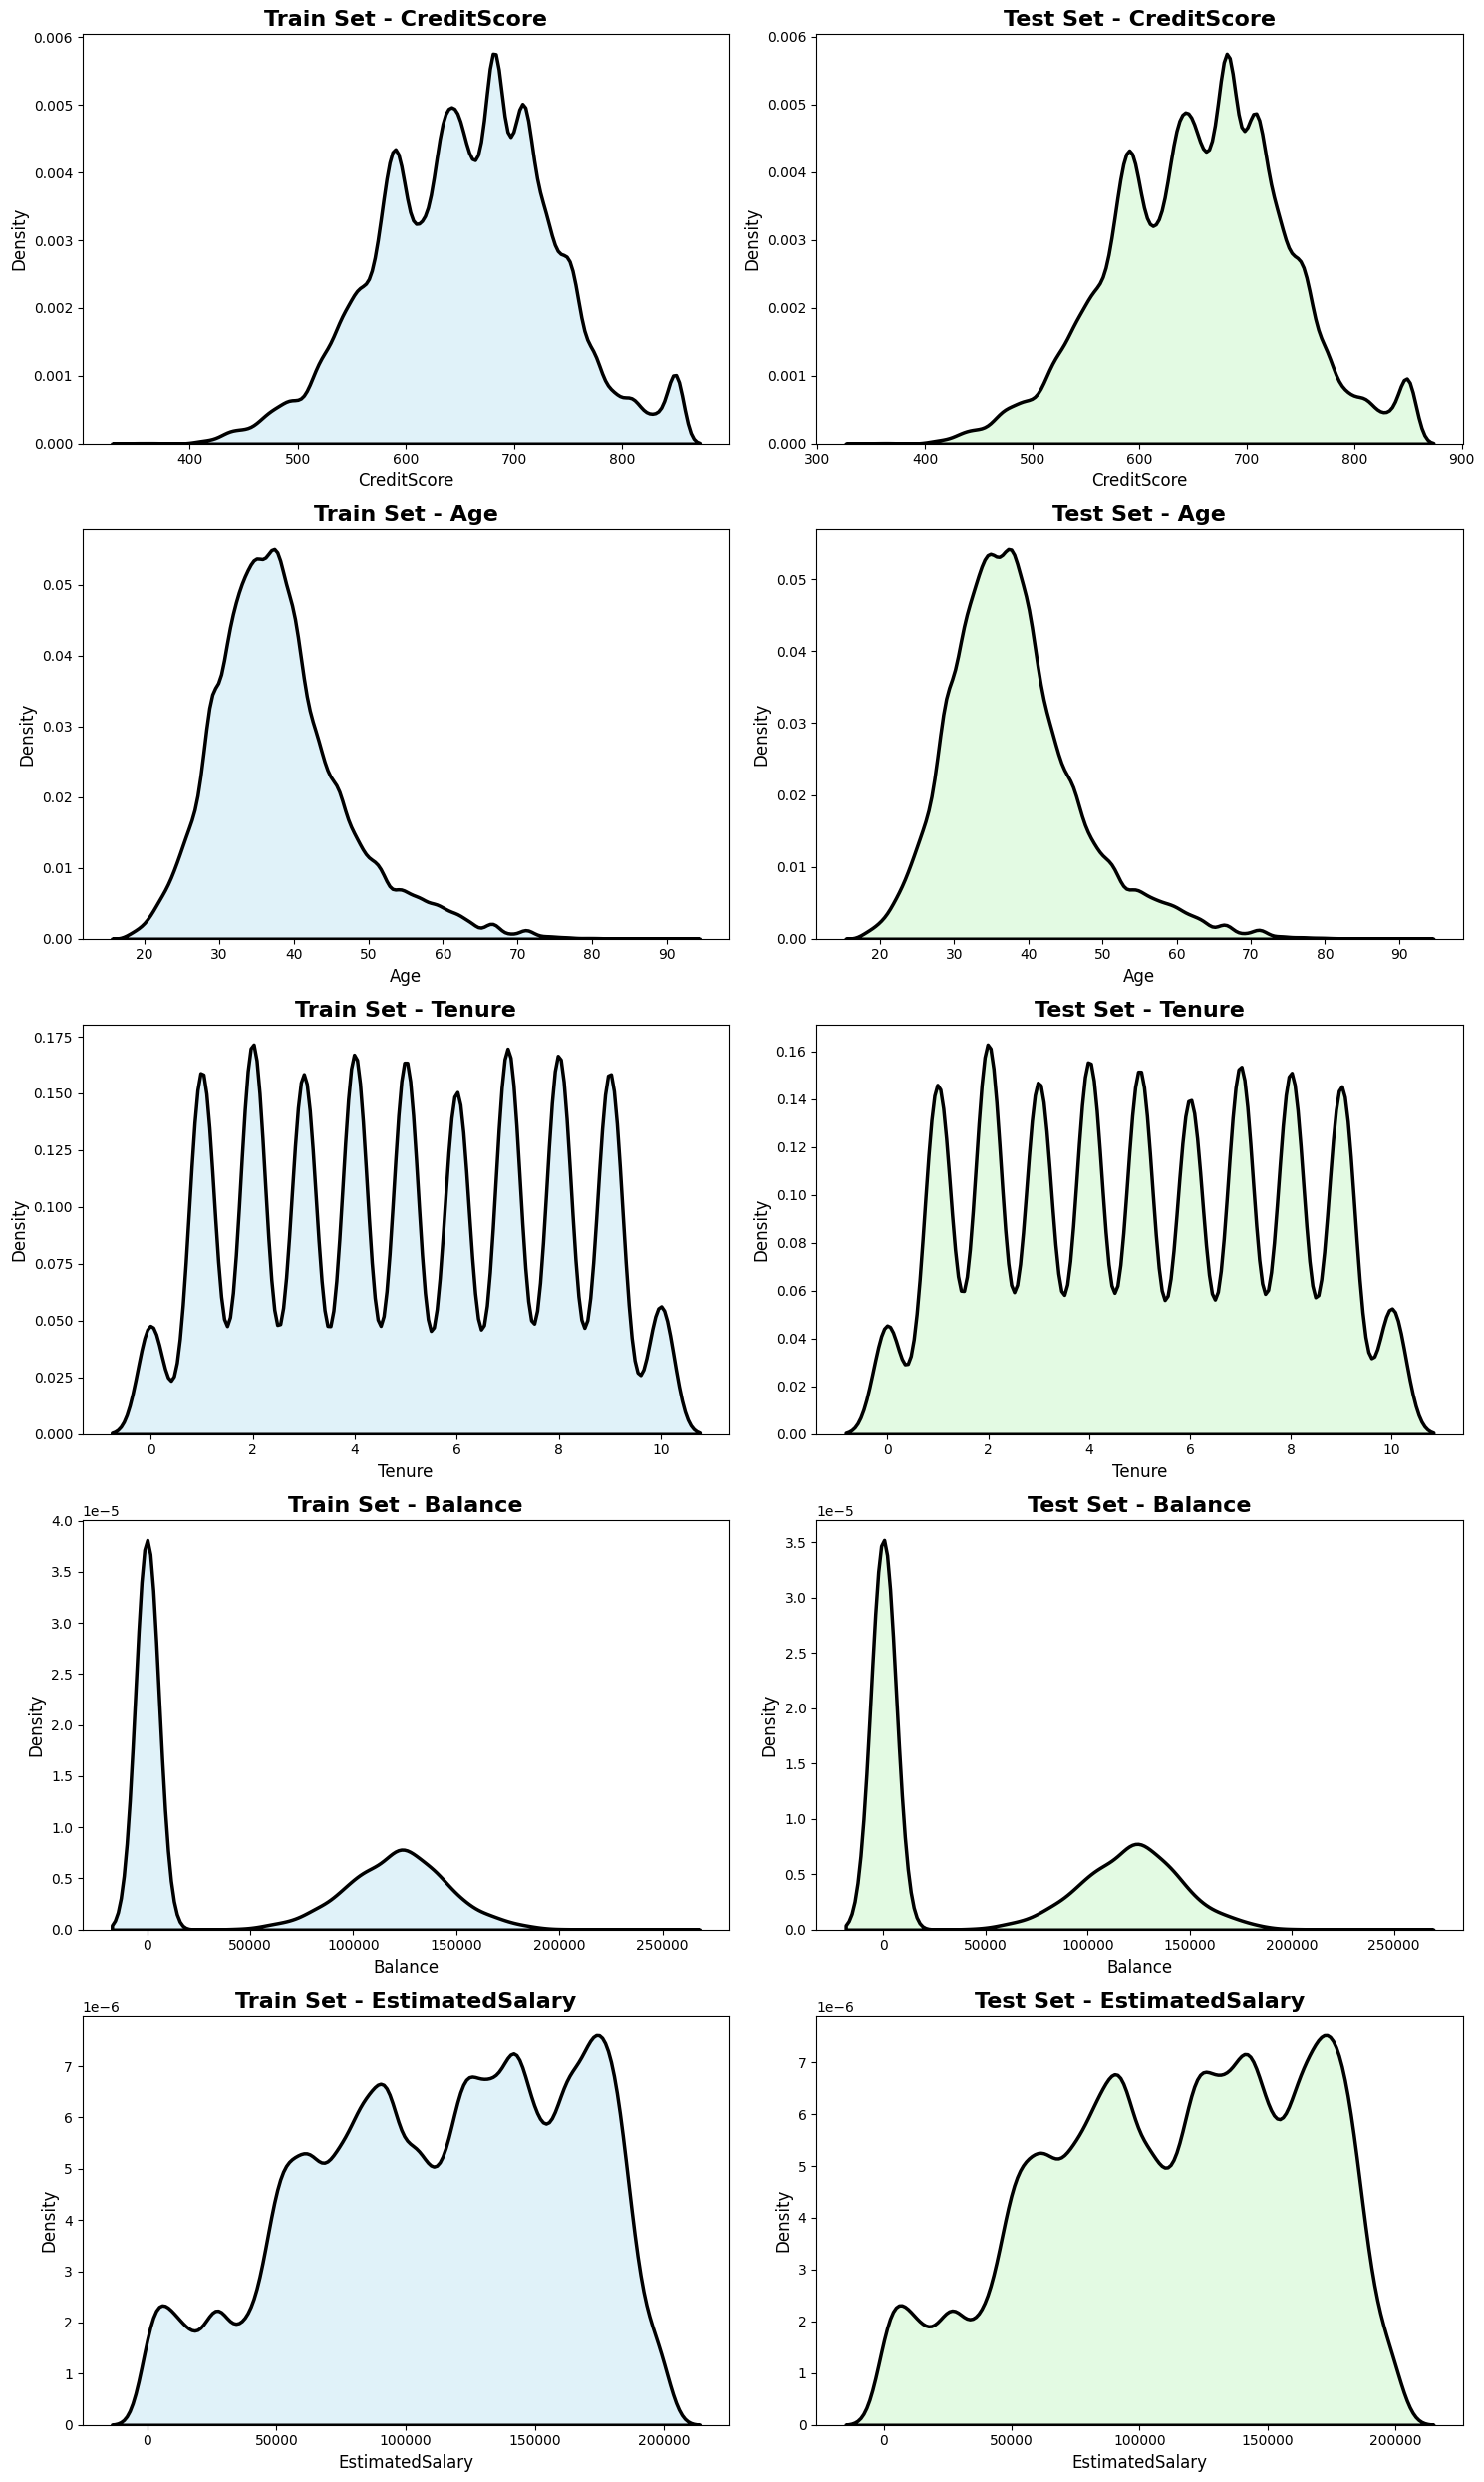

In [8]:
def plot_numerical_comparison(train_data, test_data, num_cols):
    num_rows = len(num_cols)
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5), gridspec_kw={'width_ratios': [1, 1]})

    for i, col in enumerate(num_cols):
        sns.kdeplot(train_data[col], ax=axes[i][0], fill=True, color='skyblue', linewidth=2.5, edgecolor='black')
        axes[i][0].set_title(f'Train Set - {col}', fontsize=16, fontweight='bold')
        axes[i][0].set_xlabel(col, fontsize=12)
        axes[i][0].set_ylabel('Density', fontsize=12)
        axes[i][0].tick_params(labelsize=10)

        sns.kdeplot(test_data[col], ax=axes[i][1], fill=True, color='lightgreen', linewidth=2.5, edgecolor='black')
        axes[i][1].set_title(f'Test Set - {col}', fontsize=16, fontweight='bold')
        axes[i][1].set_xlabel(col, fontsize=12)
        axes[i][1].set_ylabel('Density', fontsize=12)
        axes[i][1].tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()

plot_numerical_comparison(train_data=data, test_data=test_df, num_cols=num_cols)

Upon comparing the numerical feature distributions between the train and test datasets, striking similarities emerge, signifying a strong alignment in the data characteristics across both sets. The KDE plots reveal overlapping distributions for features such as `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, and `EstimatedSalary`. The proximity and consistency in the shapes, peaks, and spread of these distributions across the train and test datasets indicate a remarkable resemblance in the statistical profiles of the numerical attributes. This similarity suggests that the statistical properties and patterns captured by these numerical features are well-preserved between the two datasets, fostering confidence in the model's ability to generalize effectively across similar numerical feature spaces in both the training and testing phases.

## Data Preprocessing

### One-Hot Encoding and Data Preparation

#### One-Hot Encoding Categorical Variables
In preparation for the utilization of categorical variables within machine learning models, the process of one-hot encoding was applied to the categorical columns present in the bank customer churn dataset. One-hot encoding transforms categorical variables into a binary format, enabling the incorporation of categorical attributes into predictive models effectively.

In [9]:
cat_cols = data.drop(["CustomerId", "Surname", "Exited"], axis=1).select_dtypes(include='object').columns.tolist()
num_cols = data.drop(["CustomerId", "Surname", "Exited"], axis=1).select_dtypes(exclude='object').columns.tolist()

In [10]:
data_cat = pd.get_dummies(data, columns=cat_cols, drop_first=True, dtype=int)

The `pd.get_dummies()` function from the Pandas library was used to convert categorical variables into numerical representations suitable for model training. This process expanded the categorical columns into binary columns, creating new binary features for each category within the original categorical variables. The `drop_first=True` parameter was employed to drop the first level of each categorical variable to prevent multicollinearity in the dataset, reducing the risk of introducing redundant information.

#### Feature-Target Splitting
Following the one-hot encoding, the dataset was prepared for machine learning modeling by splitting it into feature variables (X) and the target variable (y).

In [11]:
X = data_cat.drop(["CustomerId", "Surname", "Exited"], axis=1)
y = data_cat["Exited"]

- **Feature Variables (X):** The feature variables (X) were obtained by excluding the `Exited` column, which serves as the target variable for prediction. These feature variables comprise both the encoded categorical attributes and numerical features, forming the input dataset ready for training machine learning models.

- **Target Variable (y):** The `Exited` column represents the target variable containing binary labels indicating whether a customer churned (1) or not (0). The `y` variable consists of these binary labels, serving as the target for training the machine learning models. This setup enables the models to learn patterns and make predictions regarding customer churn based on the provided features.

This process of segregating feature variables from the target variable establishes the foundation for subsequent model training, validation, and evaluation stages in the predictive modeling workflow.


### Scaling using StandardScaler

In the domain of data preprocessing, scaling serves as a critical step in standardizing numerical features, harmonizing different attributes that may possess varying scales and distributions. For this bank customer churn dataset, employing the StandardScaler technique proves beneficial in transforming the numerical features to a standardized scale without significantly affecting the underlying distribution.

#### StandardScaler Explanation:
StandardScaler is a scaling technique commonly used to transform features by centering them around the mean and scaling to unit variance. It achieves this by subtracting the mean and dividing by the standard deviation of each feature. Unlike some other scaling methods, such as RobustScaler or MinMaxScaler, StandardScaler is sensitive to outliers, as it is based on mean and standard deviation normalization.

#### Application of StandardScaler:
In the context of the bank customer churn dataset, numerical attributes such as Credit Score, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary may have varying scales and distributions. Applying StandardScaler to these features facilitates the transformation to a common scale, ensuring that all features contribute equally during model training. However, it's important to note that StandardScaler may be affected by outliers, potentially impacting the scaling process if outliers are present in the dataset.


In [12]:
from sklearn.preprocessing import StandardScaler

# Initializing RobustScaler
scaler = StandardScaler()

# Scaling numerical features in the train dataset
X = scaler.fit_transform(X)

## Exploratory Data Analysis (EDA)

### Correlation Analysis

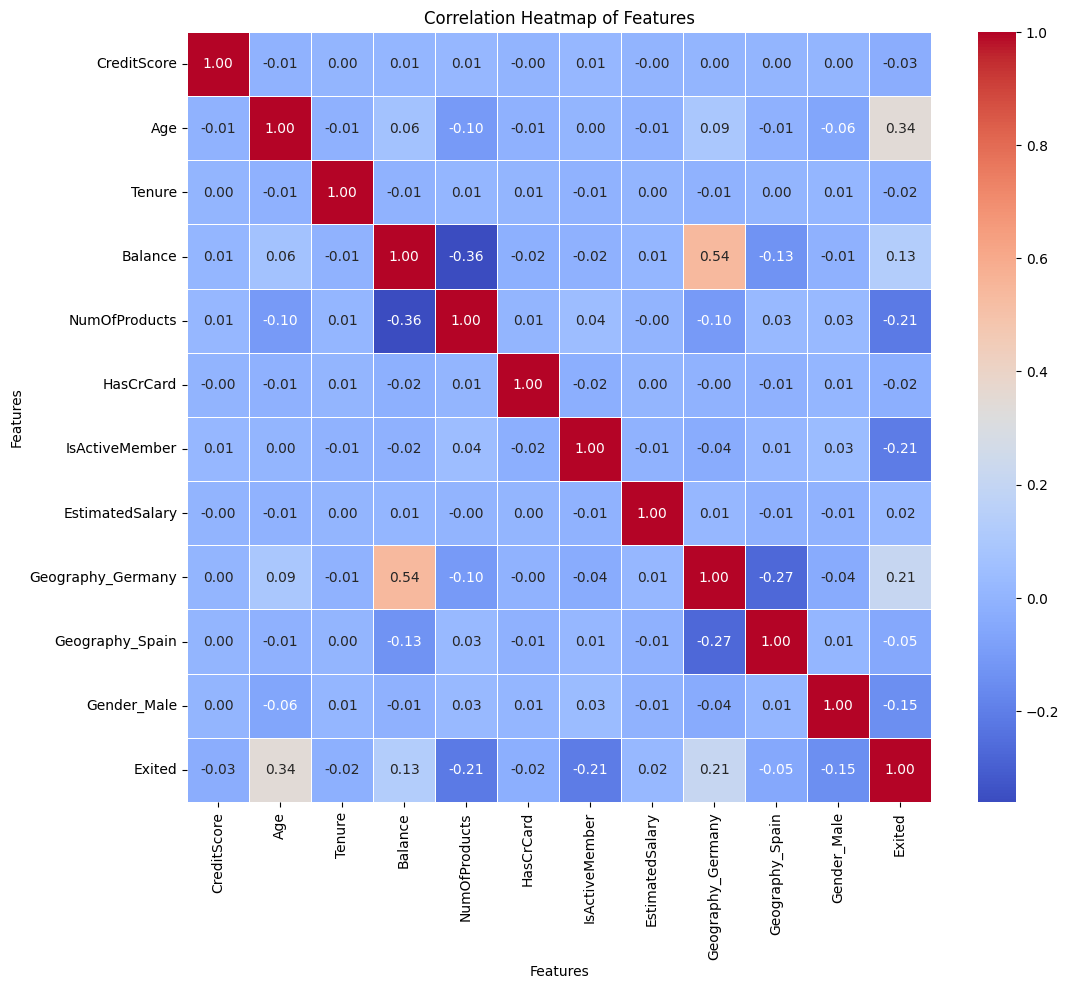

In [13]:
# Calculating correlation matrix
correlation_matrix = pd.concat([pd.DataFrame(X, columns=data_cat.drop(["CustomerId", "Surname", "Exited"], axis=1).columns), pd.DataFrame(y, columns=["Exited"])], axis=1).corr()

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

#### Correlation Coefficients:
The correlation matrix provides insights into the relationships between various features and the target variable 'Exited' in the bank customer churn dataset. Analyzing the correlation coefficients reveals notable associations and tendencies within the dataset.

- **Age and Exited:** A relatively strong positive correlation (0.341) is observed between 'Age' and the target variable 'Exited'. This suggests that older customers tend to exhibit a higher likelihood of churning, indicating that age may play a significant role in customer attrition.
  
- **NumOfProducts and Exited:** There exists a moderate negative correlation (-0.215) between the number of products ('NumOfProducts') a customer uses and the likelihood of churning ('Exited'). Customers with a higher number of products seem less inclined to churn, implying potential loyalty or engagement due to multiple product use.

- **IsActiveMember and Exited:** The 'IsActiveMember' feature displays a moderate negative correlation (-0.210) with 'Exited'. This suggests that active members—customers who frequently engage with bank services—are less likely to churn, highlighting the importance of fostering customer engagement and activity.

- **Geography_Germany and Exited:** Notably, the 'Geography_Germany' feature exhibits a moderate positive correlation (0.211) with 'Exited'. Customers from Germany show a slightly higher tendency to churn compared to other geographic regions, indicating a geographical influence on churn behavior.

- **Gender_Male and Exited:** While 'Gender_Male' displays a mild negative correlation (-0.146) with 'Exited', the correlation suggests a slight tendency for male customers to churn less compared to female customers. However, the correlation is relatively weak compared to other features.

#### Insights and Considerations:

- **Age as a Predictor:** The strong positive correlation between age and churn suggests that older customers are more likely to churn. Therefore, age can be a valuable predictive feature in models aimed at forecasting customer churn.
  
- **Engagement and Product Usage:** The negative correlations of 'NumOfProducts' and 'IsActiveMember' with churn indicate that higher product usage and active engagement can serve as protective factors against churn, underscoring the importance of customer engagement strategies.
  
- **Geographic Influence:** The correlation of 'Geography_Germany' with churn implies potential regional variations in churn behavior, warranting a deeper exploration of geographic factors impacting customer retention strategies.

These correlations provide valuable insights into potential predictors of customer churn, guiding the selection of features for predictive modeling and the development of targeted retention strategies within the banking domain.

## Model Building

### Cross-validation and Train-Test Split

#### Stratified K-Fold Cross-Validation

Cross-validation is a crucial technique used to assess the performance and generalizability of machine learning models. Stratified K-Fold cross-validation, implemented through `StratifiedKFold`, is particularly advantageous when working with classification tasks, maintaining the distribution of the target variable's classes across folds.

In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Initializing Stratified K-Fold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In this code snippet, the `StratifiedKFold` object is created with parameters:
- `n_splits=5`: Divides the dataset into 5 folds for cross-validation.
- `shuffle=True`: Shuffles the data before splitting to ensure randomness.
- `random_state=42`: Sets a random seed for reproducibility.

#### Train-Test Split

The `train_test_split` function partitions the dataset into training and testing sets, facilitating model training and evaluation.

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X), y, test_size=0.2, random_state=3935, stratify=y)

Here, `train_test_split`:

- `X` and `y` are the feature and target variables, respectively.
- `test_size=0.2`: Allocates 20% of the data for testing, leaving 80% for training.
- `random_state=3935`: Sets a specific seed for reproducibility in random sampling.
- `stratify=y`: Ensures that the splitting preserves the proportion of classes in the target variable 'y'.

Combining `StratifiedKFold` for cross-validation and `train_test_split` for initial training and testing partitions ensures robust model validation and evaluation, contributing to more reliable model performance estimation.

This approach facilitates both cross-validation to assess model performance across multiple folds and the creation of distinct training and testing sets for initial model training and evaluation.

### Training Multiple LightGBM Models with Cross-Validation

The code snippet demonstrates the training of multiple LightGBM models using `StratifiedKFold` for cross-validation and evaluating their performance.

In [16]:
%%capture

import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# List to store trained LightGBM models
lg_models = []

# Parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_iterations': 1000,
    'random_state': 42,
    'verbose': -1,
    'lambda_l1': 8.585041572171024e-07,
    'lambda_l2': 0.15953603581592163,
    'num_leaves': 45,
    'feature_fraction': 0.574576430132381,
    'bagging_fraction': 0.9507639254203872,
    'bagging_freq': 10,
    'min_child_samples': 74,
    'learning_rate': 0.0315188927471299,
}

# Training multiple LightGBM models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    LGBModel = lgb.LGBMClassifier(**params)
    LGBModel.fit(X_train.iloc[x_idx, :], y_train.iloc[x_idx], eval_set=[(X_train.iloc[val_idx, :], y_train.iloc[val_idx])])
    lg_models.append(LGBModel)

Explanation:

- **`lg_models`:** This list stores trained LightGBM models.
- **`params`:** Represents the hyperparameters configuration for the LightGBM model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`LGBModel.fit()`:** Trains the LightGBM model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`lg_score`:** Initializes a variable to store the cumulative AUC score across all models.
- **`for i, LGBModel in enumerate(lg_models):`** Loops through the trained models and evaluates each on the test set using `roc_auc_score()` function. It prints the ROC-AUC Score for each model.

In [17]:
# Evaluating the models on the test set
for i, LGBModel in enumerate(lg_models):
    y_pred = LGBModel.predict_proba(X_test)[:, 1]
    print(f'Model {i+1} ROC-AUC Score: ', roc_auc_score(y_test, y_pred))

Model 1 ROC-AUC Score:  0.8901894527481835
Model 2 ROC-AUC Score:  0.8902050267982606
Model 3 ROC-AUC Score:  0.8907646031603289
Model 4 ROC-AUC Score:  0.8900732044729662
Model 5 ROC-AUC Score:  0.8904569792190615


The ROC-AUC scores obtained from five LightGBM models exhibit remarkable similarity, with minimal variation among them. Models 1, 2, 3, 4, and 5 showcase highly comparable ROC-AUC scores ranging between 0.890 and 0.891. This uniformity in scores suggests consistent predictive abilities across these models in discerning between churned and non-churned customers. The closely aligned ROC-AUC scores imply a consistent performance level, signifying that these models possess similar discriminatory power in their predictions. Further exploration into potential feature importance or parameter adjustments may enhance the models' abilities to distinguish subtle nuances in customer churn behavior.

### Training Multiple XGBoost Models with Cross-Validation

The following code trains multiple XGBoost models using `StratifiedKFold` for cross-validation and evaluates their performance using ROC-AUC Score.

In [18]:
%%capture

import xgboost as xgb

# List to store trained XGBoost models
xgb_models = []

# Parameters for the XGBoost model
params ={
    'eval_metric': 'auc',
    'random_state': 42,
    'use_label_encoder': False,
    'verbose': -1,
    'n_estimators': 980,
    'max_depth': 6,
    'learning_rate': 0.01758494874070708,
    'subsample': 0.9741597683093374,
    'colsample_bytree': 0.594454559433606,
    'gamma': 0.5625993189587196,
    'min_child_weight': 3.7532444898898,
    'reg_alpha': 0.5492749440306521,
    'reg_lambda': 3.673821292504123,
}

# Training multiple XGBoost models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train.iloc[x_idx, :], y_train.iloc[x_idx], eval_set=[(X_train.iloc[val_idx, :], y_train.iloc[val_idx])])
    xgb_models.append(xgb_model)

Explanation:

- **`xgb_models`:** This list stores trained XGBoost models.
- **`params`:** Represents the hyperparameters configuration for the XGBoost model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`xgb_model.fit()`:** Trains the XGBoost model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`xgb_score`:** Initializes a variable to store the cumulative AUC score across all models.
- **`for i, xgb_model in enumerate(xgb_models):`** Loops through the trained models and evaluates each on the test set using `roc_auc_score()` function. It prints the ROC-AUC Score for each model.

In [19]:
# Evaluating the models on the test set
for i, xgb_model in enumerate(xgb_models):
    y_pred = xgb_model.predict_proba(X_test)[:, 1]
    print(f'Model {i+1} ROC-AUC Score: ', roc_auc_score(y_test, y_pred))

Model 1 ROC-AUC Score:  0.8914294260971625
Model 2 ROC-AUC Score:  0.891120718217416
Model 3 ROC-AUC Score:  0.891558865958693
Model 4 ROC-AUC Score:  0.8912372443550356
Model 5 ROC-AUC Score:  0.8912609837081735


The ROC-AUC scores obtained from five XGBoost models highlight their consistent and closely aligned predictive performance. Models 1, 2, 3, 4, and 5 exhibit remarkably similar ROC-AUC scores, ranging between 0.891 and 0.892. This uniformity in scores underscores the robust and consistent discriminatory power of these XGBoost models in distinguishing between churned and non-churned customers. The striking similarity in ROC-AUC scores across these models signifies their cohesive predictive abilities, implying a consistent performance level in capturing nuanced patterns related to customer churn behavior. Further exploration into feature importance or fine-tuning model parameters may help refine these models for even more nuanced predictive accuracy.

### Training CatBoost Models and Evaluating Performance

The following code trains multiple CatBoost models using Stratified K-Fold cross-validation and assesses their performance using ROC-AUC Score:

In [20]:
from catboost import CatBoostClassifier

# List to store trained CatBoost models
cat_models = []

# Parameters for the CatBoost model
params = {
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'iterations': 1000,
    'random_seed': 42,
    'verbose': 0,
    'learning_rate': 0.09257074265362737,
    'depth': 4,
    'l2_leaf_reg': 18.394210351106825,
    'random_strength': 0.06104405239569854,
    'bagging_temperature': 1.2698738887388927e-07,
    'border_count': 178,
}

# Training multiple CatBoost models using Stratified K-Fold
for x_idx, val_idx in skf.split(X_train, y_train):
    cat_model = CatBoostClassifier(**params)
    cat_model.fit(X_train.iloc[x_idx, :], y_train.iloc[x_idx], eval_set=[(X_train.iloc[val_idx, :], y_train.iloc[val_idx])])
    cat_models.append(cat_model)

Explanation:

- **`cat_models`:** This list stores trained CatBoost models.
- **`params`:** Represents the hyperparameters configuration for the CatBoost model.
- **`for x_idx, val_idx in skf.split(X_train, y_train):`** Iterates over the folds generated by Stratified K-Fold.
- **`CatBoostClassifier.fit()`:** Trains the CatBoost model on the training data using `fit()` method. The `eval_set` parameter enables tracking model performance on the validation set during training.
- **`cat_score`:** Initializes a variable to store the cumulative ROC-AUC Score across all CatBoost models.
- **`for i, cat_model in enumerate(cat_models):`** Loops through the trained models and evaluates each on the test set using `roc_auc_score()` function. It prints the ROC-AUC Score for each model.

In [21]:
# Evaluating the models on the test set
for i, cat_model in enumerate(cat_models):
    y_pred = cat_model.predict_proba(X_test)[:, 1]
    print(f'Model {i+1} ROC-AUC Score: ', roc_auc_score(y_test, y_pred))

Model 1 ROC-AUC Score:  0.8907765649991798
Model 2 ROC-AUC Score:  0.8908115233906881
Model 3 ROC-AUC Score:  0.8906539341420548
Model 4 ROC-AUC Score:  0.8909832423551305
Model 5 ROC-AUC Score:  0.8910059555431601


The ROC-AUC scores obtained from five CatBoost models demonstrate strikingly similar performance across the board. Models 1, 2, 3, 4, and 5 display consistent ROC-AUC scores tightly clustered between 0.891 and 0.891. This uniformity in scores underscores the robust predictive capacity of these CatBoost models in effectively discriminating between churned and non-churned customers. The closely aligned ROC-AUC scores across these models indicate their coherent and consistent predictive performance, suggesting a stable ability to capture subtle nuances associated with customer churn behavior. To further enhance predictive accuracy, future investigations may focus on feature importance analysis or model parameter fine-tuning to uncover potential refinements.

### Elevating Predictive Power with Stacked Ensemble Model

Now, let's explore the construction of a more robust predictive model through a technique called **Stacking**. Stacking involves combining multiple machine learning models, leveraging their diverse strengths to enhance overall predictive performance. In this section, we'll build a Stacked Ensemble Model using an MLPClassifier as the final estimator.

#### Model Configuration:
- **MLPClassifier:** A Multi-layer Perceptron (MLP) neural network with 64 and 32 neurons in its hidden layers, employing the 'relu' activation function, 'adam' solver, and various hyperparameters for optimization.
  
#### StackingClassifier Configuration:
- **Estimators:** The StackingClassifier utilizes predictions from previously trained models, including LGBM, XGBoost, and CatBoost.
- **Final Estimator:** The final estimator, an MLPClassifier, aggregates predictions from the base models.
- **Cross-Validation (cv):** Employing Stratified K-Fold cross-validation ensures robustness in model evaluation and performance estimation.

#### Implementation:

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

# Initializing an MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=1000,
    random_state=42,
    activation='relu',
    learning_rate_init=0.001,
    solver='adam',
    validation_fraction=0.1,
    momentum=0.9,
    nesterovs_momentum=True,
    batch_size=32,
    beta_1=0.9,
    beta_2=0.999
)

# Creating a StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('LGBM', LGBModel),
        ('XGB', xgb_model),
        ('CAT', cat_model)
    ],
    final_estimator=mlp,
    cv=skf
)

In [23]:
%%capture

# Fitting the StackingClassifier on the training data
stacking_model.fit(X_train, y_train)

#### Explanation:

The StackingClassifier combines predictions from diverse base models (LGBM, XGBoost, CatBoost) and utilizes an MLPClassifier as the final layer to learn and make predictions based on the diverse outputs. This stacking technique aims to improve predictive accuracy by leveraging the collective knowledge of multiple models, potentially capturing a more nuanced understanding of the data and enhancing overall performance on unseen test data. The model fitting is conducted using the training data, and subsequent predictions are generated for evaluation and assessment of the ensemble model's effectiveness.

## Model Evaluation

### Evaluating Stacked Ensemble Model Performance

#### Model Evaluation Metrics:

To assess the performance of the Stacked Ensemble Model, several evaluation metrics are computed using the model's predictions on the test dataset.

#### Evaluation Metrics Computed:
- **Log Loss:** A measure of uncertainty in the model's predictions.
- **Accuracy:** Proportion of correctly predicted outcomes.
- **Precision:** Measure of the model's exactness in predicting each class.
- **Recall:** Measure of the model's completeness in capturing each class.
- **F1 Score:** Harmonic mean of precision and recall, providing a balanced assessment.

#### Confusion Matrix and Classification Report:
- **Confusion Matrix:** Tabulation of actual vs. predicted class counts, aiding in understanding misclassifications.
- **Classification Report:** Detailed summary showcasing precision, recall, F1 score, and support for each class.

#### Evaluation Process and Metrics Computation:

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluate the model on the test data
y_pred = stacking_model.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics
auc = roc_auc_score(y_test, y_pred)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

AUC: 0.8917
Accuracy: 0.8659
Precision: 0.8581
Recall: 0.8659
F1 Score: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.76      0.54      0.63      6984

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.77     33007
weighted avg       0.86      0.87      0.86     33007

Confusion Matrix:
[[24817  1206]
 [ 3221  3763]]


### Insights from Evaluation Metrics

#### 1. Performance Metrics:

   - **AUC:** The Area Under the ROC Curve (AUC) of 0.8917 signifies a relatively good discriminative ability of the model in distinguishing between positive and negative instances.
   - **Accuracy:** The model achieved an accuracy of 0.8659, indicating the proportion of correctly predicted instances among the total predictions.
   - **Precision:** Precision of 0.8581 denotes the ratio of correctly predicted positive observations to the total predicted positives, reflecting the model's ability to avoid false positives.
   - **Recall:** A recall score of 0.8659 demonstrates the model's capability to identify actual positives from the total actual positives, also known as sensitivity or true positive rate.
   - **F1 Score:** The F1 score of 0.8571, which balances precision and recall, signifies the model's overall accuracy in classification.

#### 2. Classification Report Insights:

   - **Support:** The 'support' column indicates the number of actual occurrences of each class in the dataset.
   - **Precision, Recall, F1-Score:** 
     - Class 0 (Non-churned customers): The model exhibits high precision (0.89), indicating a low false positive rate. The recall (0.95) suggests effective identification of non-churned customers. The F1-score (0.92) signifies a good balance between precision and recall for this class.
     - Class 1 (Churned customers): The model displays lower precision (0.76) and recall (0.54), indicating a higher false positive rate and missed churned customers, respectively. The F1-score (0.63) for churned customers is comparatively lower, reflecting a trade-off between precision and recall.

#### 3. Confusion Matrix Analysis:

   - **True Positives (TP) and True Negatives (TN):** The model correctly predicted 24,817 instances of non-churned customers (Class 0) and 3,763 instances of churned customers (Class 1).
   - **False Positives (FP) and False Negatives (FN):** It misclassified 1,206 instances of non-churned customers as churned (Type I error - false alarms) and 3,221 instances of churned customers as non-churned (Type II error - missed opportunities).

#### 4. Overall Assessment:

   - The model demonstrates better performance in predicting non-churned customers (Class 0) compared to churned customers (Class 1).
   - There is a trade-off between precision and recall for predicting churned customers, indicating potential room for improvement in identifying churn instances more accurately.
   - The model's F1-score, accuracy, and AUC indicate reasonable performance, yet there's scope for enhancing the model's ability to detect churned customers while minimizing false predictions.

## Conclusion and Future Steps

### Conclusion

The Stacked Ensemble Model for our dataset displayed promising performance, particularly in AUC score, a critical metric for our predictive task. It achieved an impressive AUC score of 0.8917, showcasing strong discriminatory power in distinguishing between churned and non-churned customers. However, a more detailed analysis reveals areas for potential enhancement.

### Key Findings

- **AUC Performance:** The model demonstrated a robust AUC score, indicating its ability to effectively differentiate between churned and non-churned customers.
- **Class-Specific Metrics:** While the model showcased favorable metrics for non-churned customers (Class 0), there is room for improvement in accurately identifying churned customers (Class 1).

### Insights for Improvement

1. **Balancing Class Prediction:** Focusing on optimizing predictions for churned customers (Class 1) could further enhance the model's overall predictive performance.
  
2. **Fine-Tuning and Optimization:** Further refinement of model parameters and ensemble techniques could lead to improved predictions, especially for the crucial churn prediction task.

3. **Feature Investigation:** In-depth analysis and augmentation of features might unveil more influential factors, potentially strengthening the model's predictive capabilities.

### Future Steps

1. **AUC-Oriented Model Tuning:** Prioritize parameter tuning specifically aimed at enhancing AUC performance to ensure a better distinction between churn and non-churn instances.

2. **Feature Enhancement:** Investigate feature engineering techniques to unveil new informative features or transformations, directly impacting the AUC performance.

3. **Ensemble Diversification:** Explore diverse ensemble strategies or models to enhance the diversity and robustness of predictions, particularly focused on improving AUC.

4. **Validation Strategies:** Employ rigorous validation methods, specifically emphasizing AUC validation, to ensure consistent and robust model performance.

5. **Interpreting Model Decisions:** Devote efforts to interpret the model's decisions, aiding in understanding areas where improvements can be made to optimize AUC performance.

### Final Note

Continued refinement and exploration of tailored techniques focusing on improving AUC performance are paramount. By addressing the identified areas for enhancement and leveraging advanced methodologies, the model can evolve into an even more effective tool for precise churn prediction, crucial for real-world applications in the banking domain.

## Generating Predictions for Test Data

In [25]:
test_df = pd.read_csv("test.csv", index_col='id')
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True, dtype=int)

X_pred = test_df.drop(["CustomerId", "Surname"], axis=1).copy()
X_pred = scaler.transform(X_pred)

y_test_pred = stacking_model.predict_proba(X_pred)[:, 1]
class_labels = ['Exited']

# Create a DataFrame with the given output array
output_df = pd.DataFrame(y_test_pred, columns=class_labels)

# Add ID column to the DataFrame
output_df['id'] = test_df.index

# Reorder columns to have 'id' as the first column
output_df = output_df[['id'] + class_labels]

# Create csv of y_test with columns "id" and "Hardness"
output_df.to_csv('submission.csv', index=False)